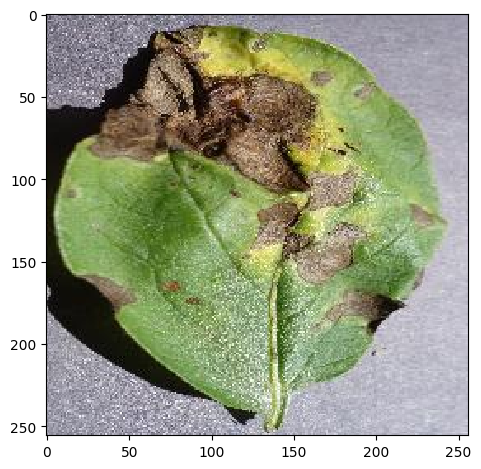

In [52]:
# import required libraries
from skimage import io
import numpy as np
image = io.imread(r'C:\Users\Arfan Shah\potato_data\binary\Train\B(Unhealthy)\1.jpg')
io.imshow(image)

In [53]:
image

array([[[151, 147, 162],
        [104, 100, 115],
        [117, 113, 128],
        ...,
        [160, 157, 174],
        [154, 151, 168],
        [148, 145, 162]],

       [[138, 134, 149],
        [132, 128, 143],
        [112, 108, 123],
        ...,
        [164, 161, 178],
        [159, 156, 173],
        [154, 151, 168]],

       [[105, 101, 116],
        [154, 150, 165],
        [ 82,  78,  93],
        ...,
        [166, 163, 180],
        [164, 161, 178],
        [161, 158, 175]],

       ...,

       [[159, 158, 172],
        [135, 134, 148],
        [151, 150, 164],
        ...,
        [200, 199, 213],
        [196, 195, 209],
        [193, 192, 206]],

       [[168, 167, 181],
        [152, 151, 165],
        [145, 144, 158],
        ...,
        [219, 218, 232],
        [221, 220, 234],
        [221, 220, 234]],

       [[136, 135, 149],
        [180, 179, 193],
        [152, 151, 165],
        ...,
        [192, 191, 205],
        [193, 192, 206],
        [192, 191, 205]]

In [54]:
height, width, channels = image.shape

print(height, width, channels)

256 256 3


In [55]:
image.shape

(256, 256, 3)

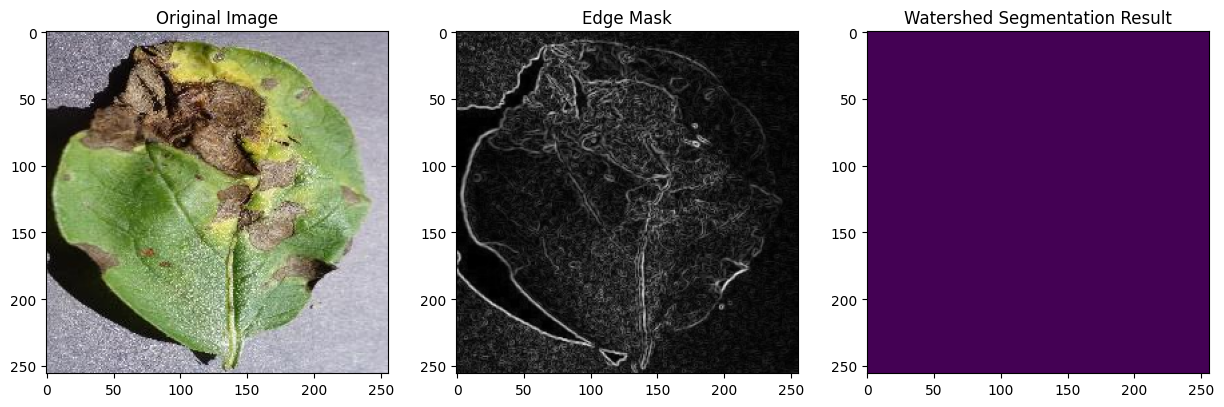

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.morphology import disk, binary_erosion
from skimage import util

# Convert the image to floating point representation
image_float = util.img_as_float(image)

# Convert the image to grayscale
image_gray = rgb2gray(image_float)

# Create an edge mask using Sobel filter
edges = filters.sobel(image_gray)

# Generate markers for watershed segmentation
markers = np.zeros_like(image_gray)
markers[image_gray < 0.7] = 1
markers[image_gray > 0.9] = 2

# Erode markers to separate regions
markers = binary_erosion(markers, disk(2))

# Apply watershed segmentation
segmentation = watershed(edges, markers)

# Label the regions and get region properties
labeled_regions = label(segmentation)
region_props = regionprops(labeled_regions)

# Visualize the original image, edge mask, and the segmented result
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(image)
ax1.set_title('Original Image')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Edge Mask')

ax3.imshow(segmentation, cmap='viridis')
ax3.set_title('Watershed Segmentation Result')

plt.show()


In [58]:
# extract features and then store in an excel file
import xlsxwriter as xlsx

# add workbook
workbook = xlsx.Workbook('unhealthy_potato_features.xlsx')

# add worksheet
worksheet = workbook.add_worksheet()

# write the features in columns
worksheet.write('A1', 'Red_Mean')
worksheet.write('B1', 'Red_Median')
worksheet.write('C1', 'Red_Variance')
worksheet.write('D1', 'Red_Std')
worksheet.write('E1', 'Green_Mean')
worksheet.write('F1', 'Green_Median')
worksheet.write('G1', 'Green_Variance')
worksheet.write('H1', 'Green_Std')
worksheet.write('I1', 'Blue_Mean')
worksheet.write('J1', 'Blue_Median')
worksheet.write('K1', 'Blue_Variance')
worksheet.write('L1', 'Blue_Std')
workbook.close()

In [59]:
# now read images from the directory
import glob

# make an empty list then add images arrays to it
images_list = []

# read each image and then add it to the empty list declared above
for file in glob.glob(r'C:\Users\Arfan Shah\potato_data\binary\Train\B(Unhealthy)\*.*'):
    image = io.imread(file)
    
    # append to list
    images_list.append(image)

print(len(images_list))

1910


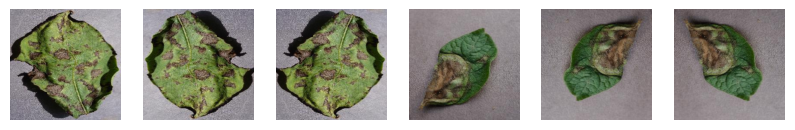

In [60]:
import matplotlib.pyplot as plt
# lets show few images
fig, axes = plt.subplots(1, 6, figsize = (10, 5))

# loop through and display images
for x in range(min(6, len(images_list))):
    axes[x].imshow(images_list[x], cmap = 'gray')
    axes[x].axis('off')
plt.show()

In [61]:
len(images_list)

1910

In [62]:
# now convert the image into array and then extract features
import math
import openpyxl
for y in range(len(images_list)):
    print(y)
    image = images_list[y]
    image_array = np.asarray(image)

    # split image data into red, green, and blue
    red = image_array[:, :, 0]
    green = image_array[:, :, 1]
    blue = image_array[:, :, 2]

    # features for Red channel
    Red_mean = np.mean(red)
    print(Red_mean)
    Red_median = np.median(red)
    print(Red_median)
    Red_variance = np.var(red)
    print(Red_variance)
    Red_std = math.sqrt(Red_variance)
    print(Red_std)

    # features for Green channel
    Green_mean = np.mean(green)
    print(Green_mean)
    Green_median = np.median(green)
    print(Green_median)
    Green_variance = np.var(green)
    print(Green_variance)
    Green_std = math.sqrt(Green_variance)
    print(Green_std)

    # features for Blue channel
    Blue_mean = np.mean(blue)
    print(Blue_mean)
    Blue_median = np.median(blue)
    print(Blue_median)
    Blue_variance = np.var(blue)
    print(Blue_variance)
    Blue_std = math.sqrt(Blue_variance)
    print(Blue_std)

    # values in list form
    values = [Red_mean, Red_median, Red_variance, Red_std, Green_mean, Green_median, Green_variance, Green_std, Blue_mean, Blue_median, Blue_variance, Blue_std]

    #writes into the general file
    outWorkbook = openpyxl.load_workbook("unhealthy_potato_features.xlsx") 
    outSheet = outWorkbook.active
    outSheet.append(values)
    
    #here the general file is being saved
    outWorkbook.save(filename="unhealthy_potato_features.xlsx")
    

0
119.12699890136719
130.0
2515.506408510497
50.154824379220955
121.58421325683594
136.0
2561.411395676201
50.610388218983275
98.03530883789062
95.0
3322.6429793601856
57.642371389110856
1
119.13021850585938
130.0
2514.9934496348724
50.149710364416585
121.58345031738281
136.0
2561.3765504488256
50.61004396805861
98.05697631835938
95.0
3320.58751297649
57.62453915630467
2
119.12940979003906
130.0
2515.0548320857342
50.15032235275995
121.58212280273438
136.0
2561.4486391460523
50.61075616058361
98.0572509765625
95.0
3320.3902464956045
57.622827477446855
3
116.41207885742188
127.0
1340.4097198238596
36.61160635404925
113.206787109375
120.0
921.1892337203026
30.351099382399685
105.87237548828125
119.0
1684.1600425504148
41.03851901019839
4
116.4107666015625
127.0
1340.321779832244
36.610405349193336
113.20693969726562
120.0
921.2084271823987
30.351415571310653
105.87208557128906
119.0
1684.228861897951
41.03935747423382
5
116.41207885742188
127.0
1340.4097198238596
36.61160635404925
113.20

In [67]:
# read the potato csv file
import pandas as pd
unhealthy_data = pd.read_excel('unhealthy_potato_features.xlsx')
unhealthy_data.head()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std
0,119.126999,130.0,2515.506409,50.154824,121.584213,136.0,2561.411396,50.610388,98.035309,95.0,3322.642979,57.642371
1,119.130219,130.0,2514.993450,50.149710,121.583450,136.0,2561.376550,50.610044,98.056976,95.0,3320.587513,57.624539
2,119.129410,130.0,2515.054832,50.150322,121.582123,136.0,2561.448639,50.610756,98.057251,95.0,3320.390246,57.622827
3,116.412079,127.0,1340.409720,36.611606,113.206787,120.0,921.189234,30.351099,105.872375,119.0,1684.160043,41.038519
4,116.410767,127.0,1340.321780,36.610405,113.206940,120.0,921.208427,30.351416,105.872086,119.0,1684.228862,41.039357


In [68]:
# add a column named as label to the excel file label it as 1
unhealthy_data['label'] = 1
unhealthy_data.tail()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
1905,133.125839,142.0,2963.158313,54.434900,137.167572,150.0,2837.986324,53.272754,116.586075,116.0,3889.363898,62.364765,1
1906,133.125687,142.0,2963.183803,54.435134,137.166656,150.0,2838.095211,53.273776,116.587219,116.0,3889.309837,62.364331,1
1907,129.943039,139.0,3196.680792,56.539197,134.615463,146.0,2745.374577,52.396322,121.884293,126.0,4157.302423,64.477147,1
1908,129.945404,139.0,3196.252299,56.535407,134.616287,146.0,2745.055722,52.393279,121.892761,126.0,4156.335241,64.469646,1
1909,132.677505,140.0,2078.870195,45.594629,142.312683,149.0,1814.519600,42.597178,119.026993,120.0,2980.279346,54.591935,1


In [69]:
un_data = r'C:\Users\Arfan Shah\Potato_Disease_DetectionandClassifictaion\Binary\unhealthy_data.xlsx'
unhealthy_data.to_excel(un_data, index = False)

In [39]:
# now make an excel file for healthy group
workbook1 = xlsx.Workbook('healthy_potato_features.xlsx')

worksheet1 = workbook1.add_worksheet()

# add columns to newly created excel sheet
worksheet1.write('A1', 'Red_Mean')
worksheet1.write('B1', 'Red_Median')
worksheet1.write('C1', 'Red_Variance')
worksheet1.write('D1', 'Red_Std')
worksheet1.write('E1', 'Green_Mean')
worksheet1.write('F1', 'Green_Median')
worksheet1.write('G1', 'Green_Variance')
worksheet1.write('H1', 'Green_Std')
worksheet1.write('I1', 'Blue_Mean')
worksheet1.write('J1', 'Blue_Median')
worksheet1.write('K1', 'Blue_Variance')
worksheet1.write('L1', 'Blue_Std')
workbook1.close()

In [40]:
# read data from the healthy directory

# declare an empty list
healthy_images_list = []
for i in glob.glob(r'C:\Users\Arfan Shah\potato_data\binary\Train\A(Healthy)\*.*'):

    # read each image
    image1 = io.imread(i)

    # now append image into image list
    healthy_images_list.append(image1)
print(len(healthy_images_list))

1824


In [41]:
# now loop the list and extract required features and add them to the excel file recently created
for z in range(len(healthy_images_list)):
    print(z)

    # read each healthy image from list
    healthy_image = healthy_images_list[z]

    # convert image into array
    healthy_image_array = np.asarray(healthy_image)

    # now split into three channels
    red_h = healthy_image_array[:, :, 0]
    green_h = healthy_image_array[:, :, 1]
    blue_h = healthy_image_array[:, :, 2]

    # extract features for red channel
    Red_mean = np.mean(red_h)
    print(Red_mean)
    Red_median = np.median(red_h)
    print(Red_median)
    Red_variance = np.var(red_h)
    print(Red_variance)
    Red_std = math.sqrt(Red_variance)
    print(Red_std)

    # extract features for green channel
    Green_mean = np.mean(green_h)
    print(Green_mean)
    Green_median = np.median(green_h)
    print(Green_median)
    Green_variance = np.var(green_h)
    print(Green_variance)
    Green_std = math.sqrt(Green_variance)
    print(Green_std)

    # extract features for blue channel
    Blue_mean = np.mean(blue_h)
    print(Blue_mean)
    Blue_median = np.median(blue_h)
    print(Blue_median)
    Blue_variance = np.var(blue_h)
    print(Blue_variance)
    Blue_std = math.sqrt(Blue_variance)
    print(Blue_std)

    # list the values accroding to headers in excel file
    healthy_values = [Red_mean, Red_median, Red_variance, Red_std, Green_mean, Green_median, Green_variance, Green_std, Blue_mean, Blue_median, Blue_variance, Blue_std]

    # load the workbook we created recently
    outworkbook = openpyxl.load_workbook('healthy_potato_features.xlsx')

    outworksheet = outworkbook.active
    outworksheet.append(healthy_values)

    # now save the file
    outworkbook.save('healthy_potato_features.xlsx')
    

0
114.66761779785156
127.0
3016.484538551187
54.9225321571319
122.45323181152344
132.0
1757.7945656662341
41.926060698165216
102.78475952148438
115.0
3073.1980257844552
55.43643229668063
1
114.60630798339844
127.0
3025.2440391888376
55.0022184933375
122.36517333984375
132.0
1763.626566644758
41.99555412951183
102.745849609375
115.0
3076.9752330183983
55.4704897492207
2
115.22280883789062
128.0
2945.942391133867
54.27653628534035
122.95741271972656
133.0
1652.2293112014886
40.64762368455859
103.24534606933594
117.0
3018.8465283287223
54.94403087077542
3
95.14991760253906
98.0
3830.2161874321755
61.888740393000205
104.9288330078125
122.0
3097.1598827689886
55.652132778259165
84.42660522460938
86.0
3592.149550951086
59.934543887069715
4
95.15249633789062
98.0
3830.307860589586
61.889481017290706
104.92715454101562
122.0
3097.045841000043
55.65110817405205
84.4261474609375
85.0
3592.172798976302
59.93473783188095
5
89.84048461914062
91.0
3909.2641056245193
62.52410819535549
100.20574951171

In [48]:
# load the diseases features dataset and then add a column named as label put 0
healthy_data = pd.read_excel('healthy_potato_features.xlsx')
healthy_data.head()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std
0,114.667618,127.0,3016.484539,54.922532,122.453232,132.0,1757.794566,41.926061,102.784760,115.0,3073.198026,55.436432
1,114.606308,127.0,3025.244039,55.002218,122.365173,132.0,1763.626567,41.995554,102.745850,115.0,3076.975233,55.470490
2,115.222809,128.0,2945.942391,54.276536,122.957413,133.0,1652.229311,40.647624,103.245346,117.0,3018.846528,54.944031
3,95.149918,98.0,3830.216187,61.888740,104.928833,122.0,3097.159883,55.652133,84.426605,86.0,3592.149551,59.934544
4,95.152496,98.0,3830.307861,61.889481,104.927155,122.0,3097.045841,55.651108,84.426147,85.0,3592.172799,59.934738


In [49]:
# add a column named as label and set it value 0
healthy_data['label'] = 0
healthy_data.tail()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
1819,90.370407,96.0,3099.443563,55.672646,101.183701,116.0,2995.566672,54.731770,80.370834,84.0,2798.735971,52.903081,0
1820,113.050247,114.0,2068.929223,45.485484,121.141739,125.0,1347.535864,36.708798,101.368484,102.0,2050.044013,45.277412,0
1821,113.050613,114.0,2068.896959,45.485129,121.141861,125.0,1347.614015,36.709863,101.368835,102.0,2050.105477,45.278090,0
1822,113.117081,113.0,1952.368082,44.185609,121.881271,125.0,1227.461047,35.035140,121.984573,125.0,1229.368826,35.062356,0
1823,221.060974,243.0,2670.036138,51.672392,235.199188,253.0,1861.692715,43.147337,208.129166,228.0,3547.508844,59.560967,0


In [50]:
# save healthy data
output = r'C:\Users\Arfan Shah\Potato_Disease_DetectionandClassifictaion\Binary\healthy_data.xlsx'
healthy_data.to_excel(output, index = False)

In [87]:
# now read the two datasets
dataset1 = pd.read_excel('healthy_data.xlsx')
dataset2 = pd.read_excel('unhealthy_data.xlsx')
dataset2.tail()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
1905,133.125839,142.0,2963.158313,54.434900,137.167572,150.0,2837.986324,53.272754,116.586075,116.0,3889.363898,62.364765,1
1906,133.125687,142.0,2963.183803,54.435134,137.166656,150.0,2838.095211,53.273776,116.587219,116.0,3889.309837,62.364331,1
1907,129.943039,139.0,3196.680792,56.539197,134.615463,146.0,2745.374577,52.396322,121.884293,126.0,4157.302423,64.477147,1
1908,129.945404,139.0,3196.252299,56.535407,134.616287,146.0,2745.055722,52.393279,121.892761,126.0,4156.335241,64.469646,1
1909,132.677505,140.0,2078.870195,45.594629,142.312683,149.0,1814.519600,42.597178,119.026993,120.0,2980.279346,54.591935,1


In [101]:
# add id column to both datasets
dataset1['id'] = range(1, len(dataset1) + 1)
dataset2['id'] = range(1, len(dataset2) + 1)

In [102]:
# display columns of both datasets
print(dataset1.columns)
print(dataset2.columns)

Index(['Red_Mean', 'Red_Median', 'Red_Variance', 'Red_Std', 'Green_Mean',
       'Green_Median', 'Green_Variance', 'Green_Std', 'Blue_Mean',
       'Blue_Median', 'Blue_Variance', 'Blue_Std', 'label', 'id'],
      dtype='object')
Index(['Red_Mean', 'Red_Median', 'Red_Variance', 'Red_Std', 'Green_Mean',
       'Green_Median', 'Green_Variance', 'Green_Std', 'Blue_Mean',
       'Blue_Median', 'Blue_Variance', 'Blue_Std', 'label', 'id'],
      dtype='object')


In [89]:
print(dataset1.dtypes)
print(dataset2.dtypes)

Red_Mean          float64
Red_Median        float64
Red_Variance      float64
Red_Std           float64
Green_Mean        float64
Green_Median      float64
Green_Variance    float64
Green_Std         float64
Blue_Mean         float64
Blue_Median       float64
Blue_Variance     float64
Blue_Std          float64
label               int64
dtype: object
Red_Mean          float64
Red_Median        float64
Red_Variance      float64
Red_Std           float64
Green_Mean        float64
Green_Median      float64
Green_Variance    float64
Green_Std         float64
Blue_Mean         float64
Blue_Median       float64
Blue_Variance     float64
Blue_Std          float64
label               int64
dtype: object


In [90]:
# find if there are null values
dataset2.isnull().sum()

Red_Mean          0
Red_Median        0
Red_Variance      0
Red_Std           0
Green_Mean        0
Green_Median      0
Green_Variance    0
Green_Std         0
Blue_Mean         0
Blue_Median       0
Blue_Variance     0
Blue_Std          0
label             0
dtype: int64

In [104]:
# now merger the two datasets into one dataset
import random


# specify column names
common_columns = ['Red_Mean', 'Red_Median', 'Red_Variance', 'Red_Std', 'Green_Mean', 'Green_Median', 'Green_Variance', 'Green_Std', 'Blue_Mean', 'Blue_Median', 'Blue_Variance', 'Blue_Std', 'label']

# merge
merged_dataset = pd.concat([dataset1, dataset2], ignore_index = True)

# shuffle rows in the dataframe
merged_dataset1 = merged_dataset.sample(frac=1).reset_index(drop=True)

# save the resultant dataframe
merged_dataset1.to_excel(r'C:\Users\Arfan Shah\Potato_Disease_DetectionandClassifictaion\Binary\dataset.xlsx', index = False)

In [1]:
# read the final merged dataset
import pandas as pd
dataset = pd.read_excel('dataset.xlsx')
dataset.head()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label,id
0,140.113083,149.0,2603.012221,51.019724,144.227325,158.0,2584.529561,50.838269,121.505066,119.0,3548.259587,59.567269,1,1894
1,138.468613,143.0,1924.943900,43.874183,131.242615,135.0,2796.868842,52.885431,131.625534,136.0,2804.728992,52.959692,0,148
2,124.287888,134.0,2244.016227,47.371048,131.009293,139.0,1287.233175,35.878032,112.467438,123.0,2318.990883,48.155902,0,762
3,140.677887,138.0,1176.956729,34.306803,152.357193,154.0,817.095390,28.584880,141.127289,137.0,1737.204928,41.679790,1,482
4,144.549698,157.0,2516.907839,50.168793,136.086304,151.0,2931.466947,54.143023,112.015900,109.0,4067.919455,63.780243,1,1822


In [2]:
# now lets remove the last column
final_dataset = dataset.drop(['id'], axis = 1)
final_dataset.head()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
0,140.113083,149.0,2603.012221,51.019724,144.227325,158.0,2584.529561,50.838269,121.505066,119.0,3548.259587,59.567269,1
1,138.468613,143.0,1924.943900,43.874183,131.242615,135.0,2796.868842,52.885431,131.625534,136.0,2804.728992,52.959692,0
2,124.287888,134.0,2244.016227,47.371048,131.009293,139.0,1287.233175,35.878032,112.467438,123.0,2318.990883,48.155902,0
3,140.677887,138.0,1176.956729,34.306803,152.357193,154.0,817.095390,28.584880,141.127289,137.0,1737.204928,41.679790,1
4,144.549698,157.0,2516.907839,50.168793,136.086304,151.0,2931.466947,54.143023,112.015900,109.0,4067.919455,63.780243,1


In [3]:
# now lets analyze the data
final_dataset.describe()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
count,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000
mean,127.021173,134.555570,2496.604123,49.278507,132.342397,140.855785,1938.278932,42.942181,112.893655,118.260712,2949.514931,53.725630,0.511516
std,23.663456,28.854537,825.283177,8.261427,24.819328,26.569680,849.053673,9.709443,22.805627,29.236425,852.200071,7.942825,0.499934
min,72.897812,56.000000,518.185390,22.763686,78.858002,82.000000,259.989089,16.124177,58.766464,37.000000,517.141674,22.740749,0.000000
25%,113.865143,118.000000,1945.191898,44.104329,118.153358,125.000000,1287.885264,35.887118,100.843750,102.000000,2339.289221,48.366199,0.000000
50%,124.814186,133.000000,2407.409319,49.065358,128.942436,137.000000,1786.849469,42.271142,110.360992,115.000000,2911.776909,53.960883,1.000000
75%,135.898186,146.000000,2952.823067,54.339884,141.196323,151.000000,2524.178194,50.241200,119.950447,127.000000,3513.775596,59.277108,1.000000
max,246.597122,255.000000,5933.460280,77.028957,251.254089,255.000000,4775.445991,69.104602,235.422943,255.000000,9020.131135,94.974371,1.000000


In [4]:
# check for null values
final_dataset.isnull().sum()

Red_Mean          0
Red_Median        0
Red_Variance      0
Red_Std           0
Green_Mean        0
Green_Median      0
Green_Variance    0
Green_Std         0
Blue_Mean         0
Blue_Median       0
Blue_Variance     0
Blue_Std          0
label             0
dtype: int64

In [5]:
# find unique values in the label
final_dataset['label'].unique()

array([1, 0], dtype=int64)

In [6]:
final_dataset['label'].head()

0    1
1    0
2    0
3    1
4    1
Name: label, dtype: int64

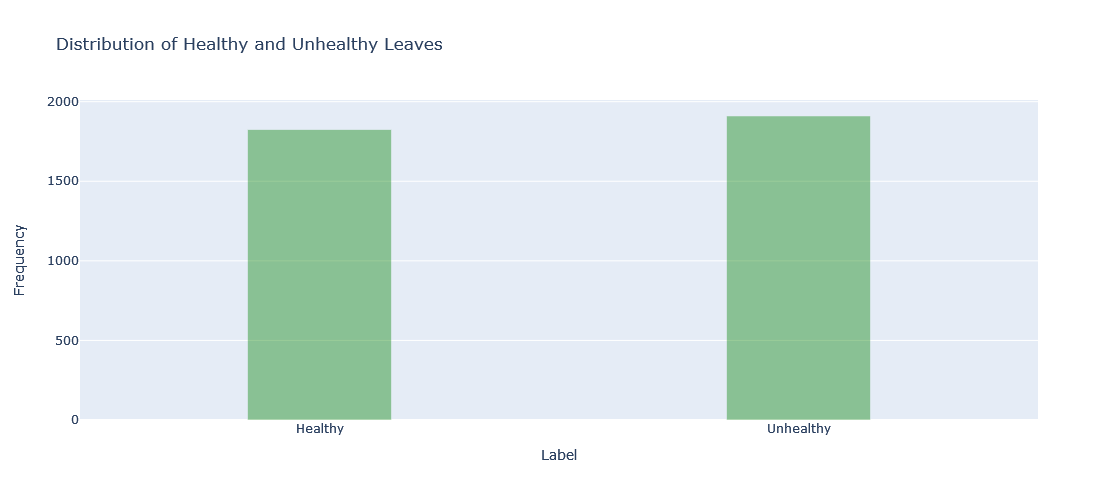

In [23]:
# lets find out how many pics we have chosen as healthy and how many as unhealthy graphically
import plotly.graph_objects as go
data = final_dataset['label'].value_counts()
fig = go.Figure()

fig.add_trace(go.Bar(x = data.index, y = data.values, marker = dict(color = 'green', opacity = 0.4), width = 0.3))
fig.update_layout(title = 'Distribution of Healthy and Unhealthy Leaves', xaxis_title = 'Label', yaxis_title = 'Frequency', height = 500)
fig.update_layout(xaxis = dict(tickvals = [0, 1], ticktext = ['Healthy', 'Unhealthy']))
fig.show()

In [24]:
# find correlation among all variables and plot them using plotly
corr_matrix = final_dataset.corr()
corr_matrix

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
Red_Mean,1.000000,0.977662,-0.151053,-0.138520,0.962381,0.941710,-0.130228,-0.116856,0.908707,0.874607,0.236098,0.220865,0.046189
Red_Median,0.977662,1.000000,-0.094639,-0.078622,0.928352,0.921248,-0.114749,-0.101935,0.881464,0.892399,0.263116,0.244902,0.014556
Red_Variance,-0.151053,-0.094639,1.000000,0.993185,-0.070402,0.068695,0.722025,0.705073,-0.160858,-0.112608,0.726688,0.708845,-0.430613
Red_Std,-0.138520,-0.078622,0.993185,1.000000,-0.060046,0.073674,0.700071,0.691394,-0.157033,-0.108182,0.718772,0.706694,-0.419593
Green_Mean,0.962381,0.928352,-0.070402,-0.060046,1.000000,0.978331,-0.149788,-0.143582,0.935095,0.887060,0.264069,0.243541,-0.053875
Green_Median,0.941710,0.921248,0.068695,0.073674,0.978331,1.000000,0.011795,0.014863,0.895382,0.857981,0.393823,0.370709,-0.076585
Green_Variance,-0.130228,-0.114749,0.722025,0.700071,-0.149788,0.011795,1.000000,0.991389,-0.231799,-0.246455,0.730766,0.731294,-0.040017
Green_Std,-0.116856,-0.101935,0.705073,0.691394,-0.143582,0.014863,0.991389,1.000000,-0.226537,-0.242455,0.732948,0.739905,-0.019322
Blue_Mean,0.908707,0.881464,-0.160858,-0.157033,0.935095,0.895382,-0.231799,-0.226537,1.000000,0.963799,0.097124,0.068327,-0.112430
Blue_Median,0.874607,0.892399,-0.112608,-0.108182,0.887060,0.857981,-0.246455,-0.242455,0.963799,1.000000,0.109730,0.081285,-0.184118


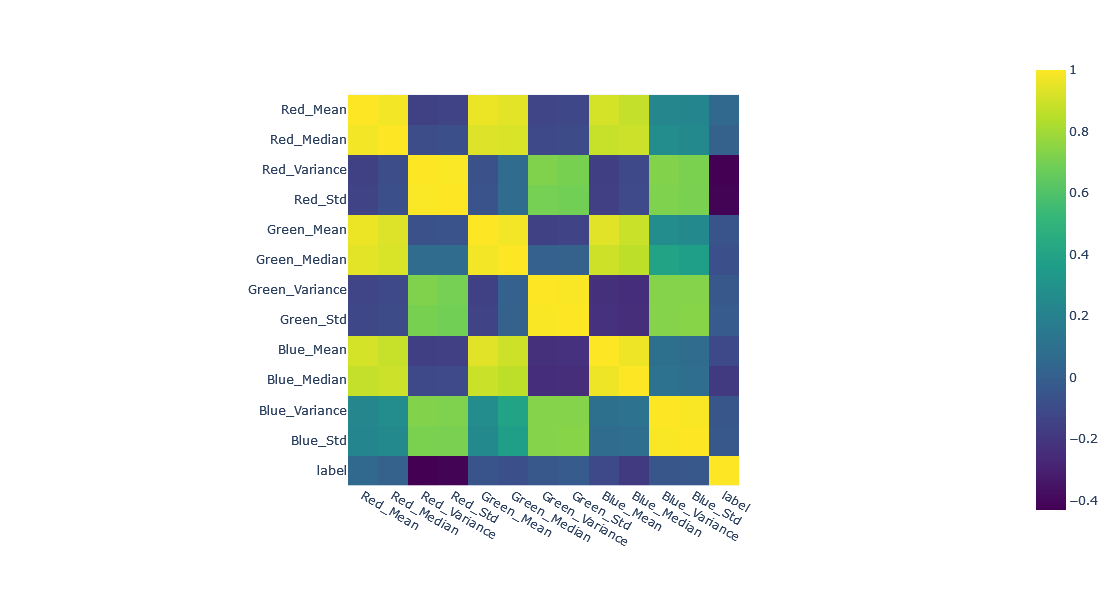

In [27]:
# plot correlation
import plotly.express as px
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'Viridis', title = '')
fig.update_layout(width = 600, height = 600)
fig.show()

In [33]:
# find few strongest correlations
strong_corr = corr_matrix.unstack().sort_values(ascending = False)
strong_corr = strong_corr[strong_corr != 1]
strong_corr.head(30)

Red_Variance    Red_Std           0.993185
Red_Std         Red_Variance      0.993185
Blue_Std        Blue_Variance     0.992215
Blue_Variance   Blue_Std          0.992215
Green_Std       Green_Variance    0.991389
Green_Variance  Green_Std         0.991389
Green_Median    Green_Mean        0.978331
Green_Mean      Green_Median      0.978331
Red_Median      Red_Mean          0.977662
Red_Mean        Red_Median        0.977662
Blue_Mean       Blue_Median       0.963799
Blue_Median     Blue_Mean         0.963799
Green_Mean      Red_Mean          0.962381
Red_Mean        Green_Mean        0.962381
Green_Median    Red_Mean          0.941710
Red_Mean        Green_Median      0.941710
Green_Mean      Blue_Mean         0.935095
Blue_Mean       Green_Mean        0.935095
Red_Median      Green_Mean        0.928352
Green_Mean      Red_Median        0.928352
Red_Median      Green_Median      0.921248
Green_Median    Red_Median        0.921248
Red_Mean        Blue_Mean         0.908707
Blue_Mean  

In [34]:
# find correlation of each variable with respect to target variable
corr_matrix = final_dataset.corr()
target_corr = corr_matrix['label']
target_corr

Red_Mean          0.046189
Red_Median        0.014556
Red_Variance     -0.430613
Red_Std          -0.419593
Green_Mean       -0.053875
Green_Median     -0.076585
Green_Variance   -0.040017
Green_Std        -0.019322
Blue_Mean        -0.112430
Blue_Median      -0.184118
Blue_Variance    -0.046193
Blue_Std         -0.033920
label             1.000000
Name: label, dtype: float64

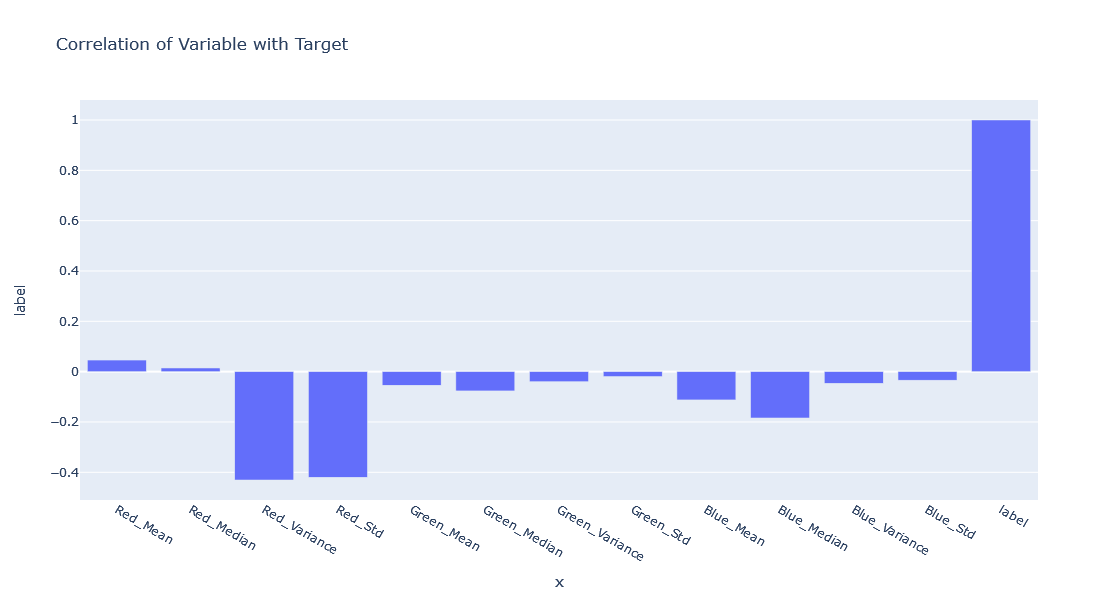

In [38]:
# bar graph to show correlation of each variable to target variable
fig = px.bar(x = target_corr.index, y = target_corr.values, labels = {'y':'label'}, title = "Correlation of Variable with Target")
fig.update_layout(height = 600)
fig.show()

## Apply ML Algorithms for classification of Diseases

In [40]:
# display few rows
final_dataset.head()

,Red_Mean,Red_Median,Red_Variance,Red_Std,Green_Mean,Green_Median,Green_Variance,Green_Std,Blue_Mean,Blue_Median,Blue_Variance,Blue_Std,label
0,140.113083,149.0,2603.012221,51.019724,144.227325,158.0,2584.529561,50.838269,121.505066,119.0,3548.259587,59.567269,1
1,138.468613,143.0,1924.943900,43.874183,131.242615,135.0,2796.868842,52.885431,131.625534,136.0,2804.728992,52.959692,0
2,124.287888,134.0,2244.016227,47.371048,131.009293,139.0,1287.233175,35.878032,112.467438,123.0,2318.990883,48.155902,0
3,140.677887,138.0,1176.956729,34.306803,152.357193,154.0,817.095390,28.584880,141.127289,137.0,1737.204928,41.679790,1
4,144.549698,157.0,2516.907839,50.168793,136.086304,151.0,2931.466947,54.143023,112.015900,109.0,4067.919455,63.780243,1


In [41]:
# number of rows in the dataset
len(final_dataset)

3734

In [43]:
# distribute data into independent and dependent variables
x = final_dataset.iloc[:, :-1]
y = final_dataset.iloc[:, -1]
y.head()

0    1
1    0
2    0
3    1
4    1
Name: label, dtype: int64

In [55]:
# now split dataset into training and testing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

# lets apply now KNN classifier and check the results

knn_binary_model = KNeighborsClassifier(n_neighbors = 2)
knn_binary_model.fit(x_train, y_train)
pred = knn_binary_model.predict(x_test)

accuracy = accuracy_score(pred, y_test)
precision = precision_score(pred, y_test)
recall = recall_score(pred, y_test)
f1 = f1_score(pred, y_test)

print("Accuracy of the model is", accuracy)
print("Precision of the model is", precision)
print("Recall of the model is", recall)
print("F1 Score of the model is", f1)

Accuracy of the model is 0.9665327978580991
Precision of the model is 0.9455445544554455
Recall of the model is 0.9922077922077922
F1 Score of the model is 0.9683143219264891


In [57]:
# save the model using pickle
import pickle
with open('knn_binary_model.pkl', 'wb') as file:
    pickle.dump(knn_binary_model, file)

In [74]:
# now load the model and classify a random image
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

with open('knn_binary_model.pkl', 'rb') as file:
    model = pickle.load(file)

# read new image
image = io.imread(r'C:\Users\Arfan Shah\potato_data\binary\Single\A(Healthy).jpg')

# convert image into array
image_array = np.asarray(image)

# now split into three channels
red_h = image_array[:, :, 0]
green_h = image_array[:, :, 1]
blue_h = image_array[:, :, 2]

# extract features for red channel
Red_mean = np.mean(red_h)
Red_median = np.median(red_h)
Red_variance = np.var(red_h)
Red_std = math.sqrt(Red_variance)

# extract features for green channel
Green_mean = np.mean(green_h)
Green_median = np.median(green_h)
Green_variance = np.var(green_h)
Green_std = math.sqrt(Green_variance)

# extract features for blue channel
Blue_mean = np.mean(blue_h)
Blue_median = np.median(blue_h)
Blue_variance = np.var(blue_h)
Blue_std = math.sqrt(Blue_variance)

# list the values accroding to headers in excel file
values = [Red_mean, Red_median, Red_variance, Red_std, Green_mean, Green_median, Green_variance, Green_std, Blue_mean, Blue_median, Blue_variance, Blue_std]

# convert into array
arr = np.array(values)

# reshape values
vals = arr.reshape(1, -1)

# predict the image
prediction = model.predict(vals)

prediction

C:\Users\Arfan Shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array([0], dtype=int64)

In [72]:
# find number of features the model is trained on
print(f"Number of features expected by the model: {model.n_features_in_}")

Number of features expected by the model: 12


In [73]:
# now find number of features extracted for the new image
print(f"Number of features in the new image: {vals.shape[1]}")

Number of features in the new image: 1
